In [2]:
import numpy as np
import edf
from time import time
import sys
import matplotlib.pyplot as plt

In [3]:
traindata = './mnist_data/train.npz'
valdata = './mnist_data/test.npz'

data = np.load(traindata)
t_imgs = np.float32(data['imgs'])/255.
t_labels = np.float32(data['labels'])

data = np.load(valdata)
v_imgs = np.float32(data['imgs'])/255.
v_labels = np.float32(data['labels'])

Random accuracy = 0.1329
Epoch 0: train loss = 0.1196 [7.7787 secs]
test accuracy=0.96650
Epoch 1: train loss = 0.0711 [8.2555 secs]
test accuracy=0.97950
Epoch 2: train loss = 0.0560 [8.0581 secs]
test accuracy=0.98510
Epoch 3: train loss = 0.0440 [8.0338 secs]
test accuracy=0.98670
Epoch 4: train loss = 0.0337 [8.2145 secs]
test accuracy=0.98890
Epoch 5: train loss = 0.0327 [7.9346 secs]
test accuracy=0.98990
Epoch 6: train loss = 0.0214 [7.9774 secs]
test accuracy=0.99400
Epoch 7: train loss = 0.0157 [7.9484 secs]
test accuracy=0.99570
Epoch 8: train loss = 0.0123 [7.9846 secs]
test accuracy=0.99570
Epoch 9: train loss = 0.0081 [8.0347 secs]
test accuracy=0.99810


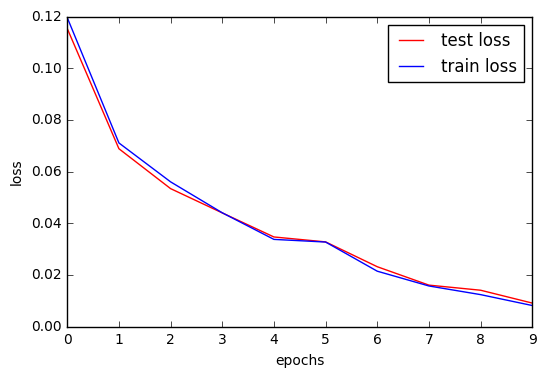

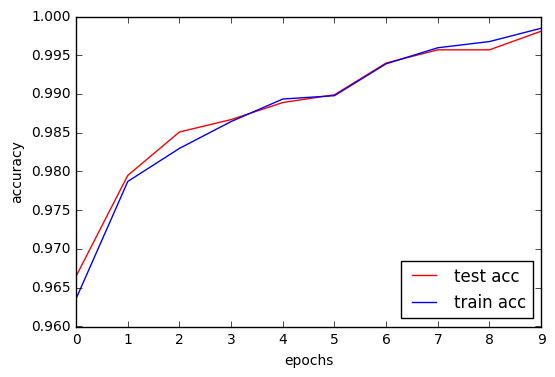

In [8]:
############################# Demonstration that SGD works for min-batch setting ############################## 


######################################### please modify this cell to finish the problem 2.a #######################
# for repeatability
np.random.seed(0)

# Inputs and parameters
inp = edf.Value()
lab = edf.Value()

W1 = edf.Param(edf.xavier((28*28,128)))
B1 = edf.Param(np.zeros((128)))
W2 = edf.Param(edf.xavier((128,10)))
B2 = edf.Param(np.zeros((10)))

# models
hidden = edf.RELU(edf.Add(edf.VDot(inp,W1),B1))
pred = edf.SoftMax(edf.Add(edf.VDot(hidden,W2),B2))
loss = edf.LogLoss(edf.Aref(pred, lab))
acc = edf.Accuracy(pred,lab)

# batch size, please try 10, 50 and 100. For each run, you might need to reloading the kernel (edf.py) 
# to clear the history information
batch = 50
# learning rate eta, measured by per-batch unit. If you change this batch size, you might also change eta 
# accoridng to the equation given in the homework.
eta = 0.37

# evaluate the random performance
def eval(imgs, labels):
    
    batches = range(0, len(labels), batch)
    objective = 0
    accuracy = 0
    for k in batches:
        inp.set(t_imgs[k:k+batch])
        lab.set(t_labels[k:k+batch])
        edf.Forward()
        objective += np.mean(loss.value)
        accuracy += acc.value
    
    return accuracy/len(batches), objective/len(batches)


accuracy, objective = eval(t_imgs, t_labels)
print("Random accuracy = %.4f" % accuracy)

# train loop
train_loss = []
train_acc = []
test_loss = []
test_acc = []
ep = 0
stime = time()
epoch = 10
batches = range(0, len(t_labels), batch)

while ep < epoch:

    # randon shuffle the train data in each epoch
    perm = np.random.permutation(len(t_labels))
    for k in batches:    
        inp.set(t_imgs[perm[k:k+batch]])
        lab.set(t_labels[perm[k:k+batch]])
        edf.Forward()
        edf.Backward(loss)
        edf.SGD(eta)

    # evaluate on trainset
    t_acc, t_loss = eval(t_imgs, t_labels)
    print("Epoch %d: train loss = %.4f [%.4f secs]" % (ep, t_loss,time()-stime))
    train_loss.append(t_loss)
    train_acc.append(t_acc)

    # evaluate on testset
    v_acc, v_loss = eval(v_imgs, v_labels)
    print("test accuracy=%.5f" % v_acc)
    test_loss.append(v_loss)
    test_acc.append(v_acc)
    stime = time()
    ep += 1

# plot
plt.figure(1)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(np.arange(len(test_loss)), test_loss, color='red')
plt.plot(np.arange(len(train_loss)), train_loss, color='blue')
plt.legend(['test loss', 'train loss'], loc='upper right')
plt.show()

plt.figure(2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(np.arange(len(test_acc)), test_acc, color='red')
plt.plot(np.arange(len(train_acc)), train_acc, color='blue')
plt.legend(['test acc', 'train acc'], loc='lower right')
plt.show()    

Random accuracy = 0.1329
Epoch 0: train loss = 0.1604 [1.773 secs]
test accuracy=0.9574
Epoch 1: train loss = 0.0983 [1.764 secs]
test accuracy=0.9751
Epoch 2: train loss = 0.0794 [1.684 secs]
test accuracy=0.9793
Epoch 3: train loss = 0.0648 [1.327 secs]
test accuracy=0.9831
Epoch 4: train loss = 0.0504 [1.316 secs]
test accuracy=0.9860
Epoch 5: train loss = 0.0450 [1.309 secs]
test accuracy=0.9881
Epoch 6: train loss = 0.0382 [1.308 secs]
test accuracy=0.9887
Epoch 7: train loss = 0.0316 [1.304 secs]
test accuracy=0.9924
Epoch 8: train loss = 0.0244 [1.308 secs]
test accuracy=0.9937
Epoch 9: train loss = 0.0202 [1.308 secs]
test accuracy=0.9947


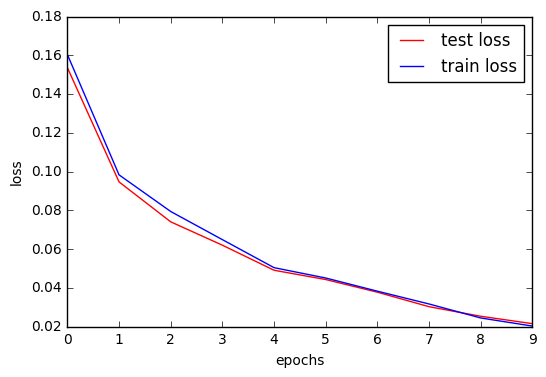

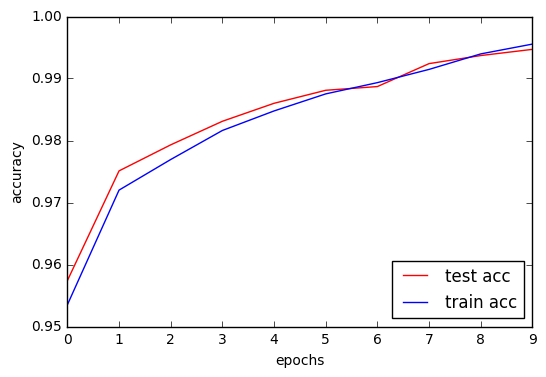

In [3]:
################### please modify this cell to finish the problem 2.b #########################################


# Optimization functions with Momentum algorithm, eta is learning rate and mom is momentum rate
# please implement this function
def Momentum(eta, mom = 0.55):
    
    # Initialize the "grad_hist" variable to memorize the history of gradient
    if 'grad_hist' not in edf.params[0].__dict__.keys():
        for p in edf.params:
            p.grad_hist = edf.DT(0)
    
    # please add code here to finish the function
    #print(len(edf.params))
    for p in edf.params:
        #if 'grad_hist' not in p.__dict__.keys():
        #    p.grad_hist = edf.DT(0)
        #print(p.grad_hist)
        
        p.grad_hist = mom*p.grad_hist + (1 - mom)*p.grad
        p.value -= eta*p.grad_hist
        p.grad = edf.DT(0)
    
    
# for repeatability
np.random.seed(0)

# Inputs and parameters
inp = edf.Value()
lab = edf.Value()

W1 = edf.Param(edf.xavier((28*28,128)))
B1 = edf.Param(np.zeros((128)))
W2 = edf.Param(edf.xavier((128,10)))
B2 = edf.Param(np.zeros((10)))

# models
hidden = edf.RELU(edf.Add(edf.VDot(inp,W1),B1))
pred = edf.SoftMax(edf.Add(edf.VDot(hidden,W2),B2))
loss = edf.LogLoss(edf.Aref(pred,lab))
acc = edf.Accuracy(pred,lab)

# batch size, please also try 10 and 100
batch = 100
# learning rate eta, measured by per-batch. If you change this batch size, you might also change eta 
# accoridng to the equation given in the homework.
eta = 0.37

# evaluate the random performance
def eval(imgs, labels):
    
    batches = range(0, len(labels), batch)
    objective = 0
    accuracy = 0
    for k in batches:
        inp.set(t_imgs[k:k+batch])
        lab.set(t_labels[k:k+batch])
        edf.Forward()
        objective += np.mean(loss.value)
        accuracy += acc.value
    
    return accuracy/len(batches), objective/len(batches)


accuracy, objective = eval(t_imgs, t_labels)
print("Random accuracy = %.4f" % accuracy)

# train loop
train_loss = []
train_acc = []
test_loss = []
test_acc = []
ep = 0
stime = time()
epoch = 10
batches = range(0, len(t_labels), batch)

while ep < epoch:

    # randon shuffle the train data in each epoch
    perm = np.random.permutation(len(t_labels))
    for k in batches:    
        inp.set(t_imgs[perm[k:k+batch]])
        lab.set(t_labels[perm[k:k+batch]])
        edf.Forward()
        edf.Backward(loss)
        
        # here, we use Momentum to optimize as in problem 2.b
        Momentum(eta)

    # evaluate on trainset
    t_acc, t_loss = eval(t_imgs, t_labels)
    print("Epoch %d: train loss = %.4f [%.3f secs]" % (ep, t_loss,time()-stime))
    train_loss.append(t_loss)
    train_acc.append(t_acc)

    # evaluate on testset
    v_acc, v_loss = eval(v_imgs, v_labels)
    print("test accuracy=%.4f" % v_acc)
    test_loss.append(v_loss)
    test_acc.append(v_acc)
    stime = time()
    ep += 1

# plot
plt.figure(1)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(np.arange(len(test_loss)), test_loss, color='red')
plt.plot(np.arange(len(train_loss)), train_loss, color='blue')
plt.legend(['test loss', 'train loss'], loc='upper right')
plt.show()

plt.figure(2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(np.arange(len(test_acc)), test_acc, color='red')
plt.plot(np.arange(len(train_acc)), train_acc, color='blue')
plt.legend(['test acc', 'train acc'], loc='lower right')
plt.show()

Random accuracy = 0.1329
Epoch 0: train loss = 0.1147 [16.222 secs]
test accuracy=0.9681
Epoch 1: train loss = 0.0775 [15.831 secs]
test accuracy=0.9767
Epoch 2: train loss = 0.0708 [19.354 secs]
test accuracy=0.9771
Epoch 3: train loss = 0.0617 [19.602 secs]
test accuracy=0.9811
Epoch 4: train loss = 0.0581 [16.491 secs]
test accuracy=0.9825
Epoch 5: train loss = 0.0502 [15.876 secs]
test accuracy=0.9835
Epoch 6: train loss = 0.0490 [16.681 secs]
test accuracy=0.9850
Epoch 7: train loss = 0.0385 [16.589 secs]
test accuracy=0.9881
Epoch 8: train loss = 0.0320 [16.763 secs]
test accuracy=0.9906
Epoch 9: train loss = 0.0321 [16.659 secs]
test accuracy=0.9898


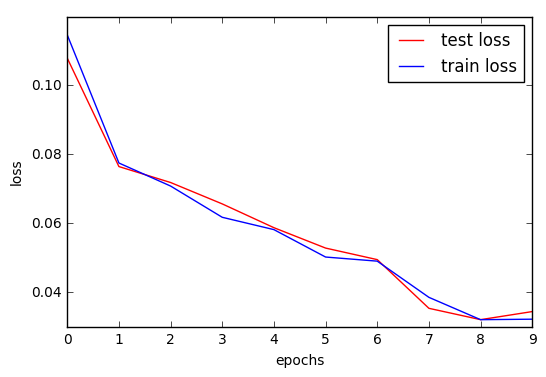

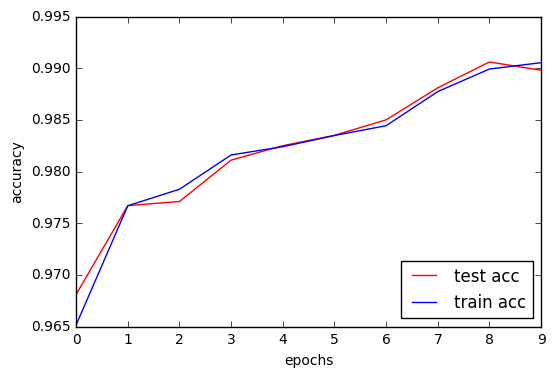

In [4]:
################### please modify this cell to finish the problem 2.c #########################################

# Optimization functions with Adam optimization algorithm.
# For details, please see: https://arxiv.org/abs/1412.6980, 
# Please implement this function

# some constant used in Adam
_a_b1t=edf.DT(1.0)
_a_b2t=edf.DT(1.0)

def Adam(eta=0.001, b1 = 0.9, b2 = 0.999, ep=1e-8):
    
    global _a_b1t
    global _a_b2t

    # Initialize the "grad_hist" variable to memorize the history of gradient
    # # Initialize the "grad_h2" variable to memorize the history of gradient variance
    if 'grad_hist' not in edf.params[0].__dict__.keys():
        for p in edf.params:
            p.grad_hist = edf.DT(0)
            p.grad_h2 = edf.DT(0)

    # please finish this function
    for p in edf.params:
        #if 'grad_hist' not in p.__dict__.keys():
        #    p.grad_hist = edf.DT(0)
        #    p.grad_h2 = edf.DT(0)
        #print(p.grad_hist)
        
        p.grad_hist = b1*p.grad_hist + (_a_b1t - b1)*p.grad
        p.grad_h2 = b2*p.grad_h2 + (_a_b2t-b2) * p.grad**2
        p.value -= eta/(np.sqrt(p.grad_h2) + ep)*p.grad_hist
        p.grad = edf.DT(0)
    
    
    
    
# for repeatability
np.random.seed(0)

# Inputs and parameters
inp = edf.Value()
lab = edf.Value()

W1 = edf.Param(edf.xavier((28*28,128)))
B1 = edf.Param(np.zeros((128)))
W2 = edf.Param(edf.xavier((128,10)))
B2 = edf.Param(np.zeros((10)))

# models
hidden = edf.RELU(edf.Add(edf.VDot(inp,W1),B1))
pred = edf.SoftMax(edf.Add(edf.VDot(hidden,W2),B2))
loss = edf.LogLoss(edf.Aref(pred,lab))
acc = edf.Accuracy(pred,lab)


# batch size, try set to 10, 50, 100
batch = 10
# eta is the learning rate and measured by per-batch unit, please tune it a little bit under different batch size.
eta = 0.0030

# evaluate the random performance
def eval(imgs, labels):
    
    batches = range(0, len(labels), batch)
    objective = 0
    accuracy = 0
    for k in batches:
        inp.set(t_imgs[k:k+batch])
        lab.set(t_labels[k:k+batch])
        edf.Forward()
        objective += np.mean(loss.value)
        accuracy += acc.value
    
    return accuracy/len(batches), objective/len(batches)


accuracy, objective = eval(t_imgs, t_labels)
print("Random accuracy = %.4f" % accuracy)

# train loop
train_loss = []
train_acc = []
test_loss = []
test_acc = []
ep = 0
stime = time()
epoch = 10
batches = range(0, len(t_labels), batch)

while ep < epoch:

    # randon shuffle the train data in each epoch
    perm = np.random.permutation(len(t_labels))
    for k in batches:    
        inp.set(t_imgs[perm[k:k+batch]])
        lab.set(t_labels[perm[k:k+batch]])
        edf.Forward()
        edf.Backward(loss)
        
        # here, we use Adam algorithm to optimize as in problem 2.c
        Adam(eta)

    # evaluate on trainset
    t_acc, t_loss = eval(t_imgs, t_labels)
    print("Epoch %d: train loss = %.4f [%.3f secs]" % (ep, t_loss,time()-stime))
    train_loss.append(t_loss)
    train_acc.append(t_acc)

    # evaluate on testset
    v_acc, v_loss = eval(v_imgs, v_labels)
    print("test accuracy=%.4f" % v_acc)
    test_loss.append(v_loss)
    test_acc.append(v_acc)
    stime = time()
    ep += 1

# plot
plt.figure(1)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(np.arange(len(test_loss)), test_loss, color='red')
plt.plot(np.arange(len(train_loss)), train_loss, color='blue')
plt.legend(['test loss', 'train loss'], loc='upper right')
plt.show()

plt.figure(2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(np.arange(len(test_acc)), test_acc, color='red')
plt.plot(np.arange(len(train_acc)), train_acc, color='blue')
plt.legend(['test acc', 'train acc'], loc='lower right')
plt.show()    